In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv(r"co2_emission.csv")
df.head()

,Entity,Code,Year,Emission
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


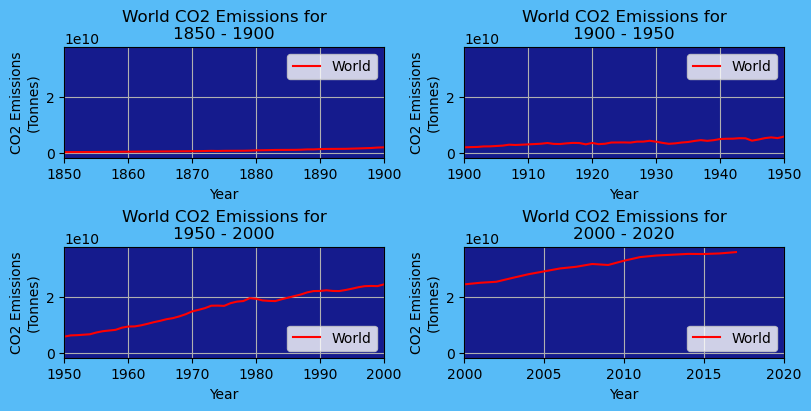

In [17]:
line_df = df[df.Entity=='World']

fig, axs = plt.subplots(2, 2, figsize = (8, 2 * 2), constrained_layout = True, facecolor='#57BBF7')

axs[0, 0].plot(line_df['Year'], line_df['Emission'], label='World', color='r')
axs[0, 0].set_xlim([1850,1900])
axs[0, 0].set(xlabel='Year', ylabel='CO2 Emissions\n' + '(Tonnes)', title='World CO2 Emissions for\n' + '1850 - 1900')
axs[0, 0].legend(loc='upper right')
axs[0,0].grid(True)
axs[0, 0].set_facecolor('#151B8D')

axs[0, 1].plot(line_df['Year'], line_df['Emission'], label='World', color='r')
axs[0, 1].set_xlim([1900,1950])
axs[0, 1].set(xlabel='Year', ylabel='CO2 Emissions\n' + '(Tonnes)', title='World CO2 Emissions for\n' + '1900 - 1950')
axs[0, 1].legend(loc='upper right')
axs[0, 1].grid(True)
axs[0, 1].set_facecolor('#151B8D')

axs[1, 0].plot(line_df['Year'], line_df['Emission'], label='World', color='r')
axs[1, 0].set_xlim([1950,2000])
axs[1, 0].set(xlabel='Year', ylabel='CO2 Emissions\n' + '(Tonnes)', title='World CO2 Emissions for\n' + '1950 - 2000')
axs[1, 0].legend(loc='lower right')
axs[1,0].grid(True)
axs[1, 0].set_facecolor('#151B8D')

axs[1, 1].plot(line_df['Year'], line_df['Emission'], label='World', color='r')
axs[1, 1].set_xlim([2000,2020])
axs[1, 1].set(xlabel='Year', ylabel='CO2 Emissions\n' + '(Tonnes)', title='World CO2 Emissions for\n' + '2000 - 2020')
axs[1, 1].legend(loc='lower right')
axs[1,1].grid(True)
axs[1, 1].set_facecolor('#151B8D')

plt.show()

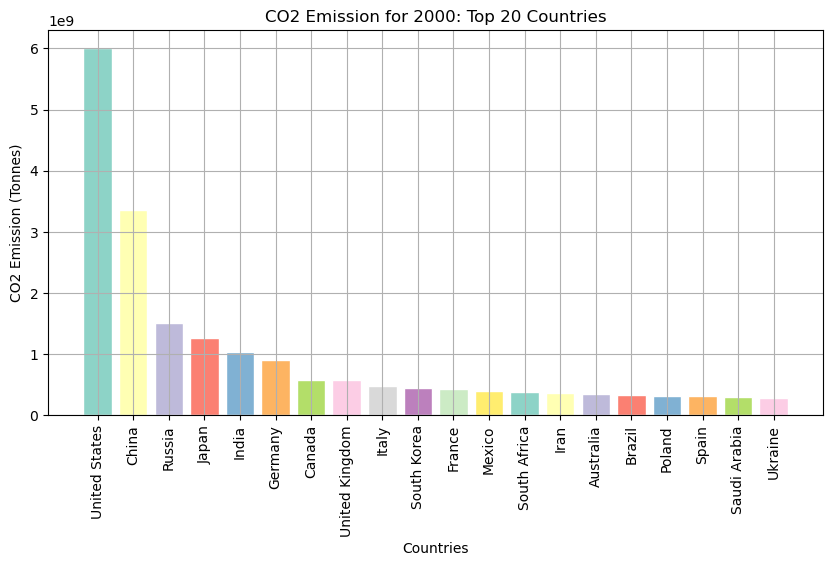

In [18]:
year00_df = df[df.Year == 2000]
year00_df = year00_df.sort_values(by='Emission', ascending=False)
year00_df.notna()

year00_df = year00_df[year00_df.Entity != 'World']
year00_df = year00_df[~pd.isna(year00_df.Code)]
year00_df.head(20)

plt.figure(figsize=(10,5))
plt.bar(year00_df.Entity.head(20), year00_df.Emission.head(20), color=sns.color_palette('Set3'), edgecolor='white')
plt.xlabel('Countries', fontsize=10)
plt.ylabel('CO2 Emission (Tonnes)')
plt.title('CO2 Emission for 2000: Top 20 Countries', fontdict={'fontsize':12})
plt.grid(True)
plt.xticks(rotation=90)

plt.show()

In [20]:
year00_sum = year00_df['Emission'].sum()
np.round(year00_sum/1e6,2)

year00_df['Emission %'] = (year00_df['Emission']/year00_sum) * 100
year00_df.tail(10)

,Entity,Code,Year,Emission,Emission %
19162,Turks and Caicos Islands,TCA,2000,69616.0,0.000285
15947,Saint Pierre and Miquelon,SPM,2000,54960.0,0.000225
16150,Sao Tome and Principe,STP,2000,47632.0,0.000195
4745,Cook Islands,COK,2000,47632.0,0.000195
6992,Falkland Islands,FLK,2000,36640.0,0.000150
10870,Kiribati,KIR,2000,29312.0,0.000120
12960,Montserrat,MSR,2000,25648.0,0.000105
15774,Saint Helena,SHN,2000,10992.0,0.000045
14047,Niue,NIU,2000,7328.0,0.000030
19190,Tuvalu,TUV,2000,7328.0,0.000030


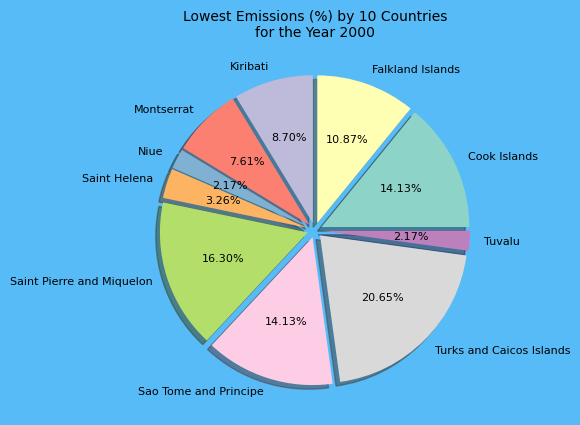

In [21]:
from matplotlib.pyplot import pie, axis, show

sums = year00_df.groupby(year00_df["Entity"].tail(10))["Emission %"].sum()

fig = plt.figure()
fig.patch.set_facecolor('#57BBF7')
axis('equal');
pie(sums, labels=sums.index, autopct='%1.2f%%',
    textprops={'fontsize':8},
    colors=sns.color_palette('Set3'),
    shadow=True, 
    explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])
plt.title("Lowest Emissions (%) by 10 Countries\n" + "for the Year 2000", fontsize=10)

show()

In [22]:
year2017_df = df[df.Year == 2017]
year2017_df = year2017_df.sort_values(by='Emission', ascending=False)
year2017_df.notna()

year2017_df = year2017_df[year2017_df.Entity != 'World']
year2017_df = year2017_df[~pd.isna(year2017_df.Code)]
top_2017 = year2017_df.head(10)
top_2017

,Entity,Code,Year,Emission
4484,China,CHN,2017,9.838754e+09
19927,United States,USA,2017,5.269530e+09
9459,India,IND,2017,2.466765e+09
15694,Russia,RUS,2017,1.692795e+09
10635,Japan,JPN,2017,1.205061e+09
7982,Germany,DEU,2017,7.993732e+08
9970,Iran,IRN,2017,6.723123e+08
16248,Saudi Arabia,SAU,2017,6.350111e+08
17065,South Korea,KOR,2017,6.160967e+08
3862,Canada,CAN,2017,5.727826e+08


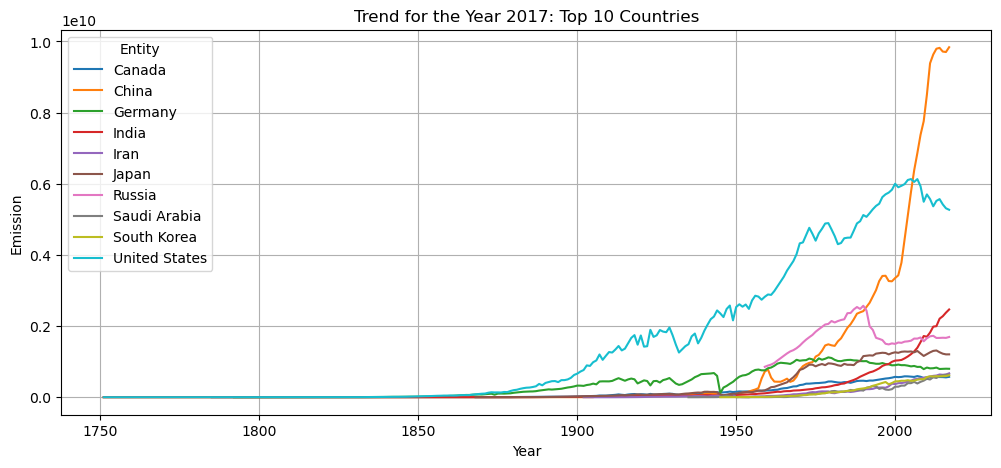

In [10]:
top_n = list(top_2017.Entity[0:10])
top_10 = df[(df.Entity.isin(top_n))]
top_10

fig = plt.figure(figsize=(12,5))

sns.lineplot(x='Year', y='Emission', hue='Entity', data=top_10)
plt.title('Trend for the Year 2017: Top 10 Countries')
plt.grid()

plt.show()